In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./results/ngc3741/data_csv.csv')
instmag = -2.5*np.log10(data['sum']/720)

0     4.763133e-15
1     2.371273e-15
2     2.374241e-15
3     4.314620e-15
4     2.642004e-15
5     3.004296e-15
6     3.308117e-15
7     2.899401e-15
8     5.245693e-15
9     1.111724e-15
10    9.939054e-15
11    3.806642e-15
12    6.360652e-15
13    3.710475e-15
14    3.059670e-15
15    6.403244e-15
16    1.296160e-14
17    6.705416e-15
18    6.611985e-14
19    1.396628e-15
20    2.919015e-15
21    3.842976e-14
22    5.023493e-14
23    5.155355e-15
Name: sum, dtype: float64
37.236218636600164 39.010553522609946


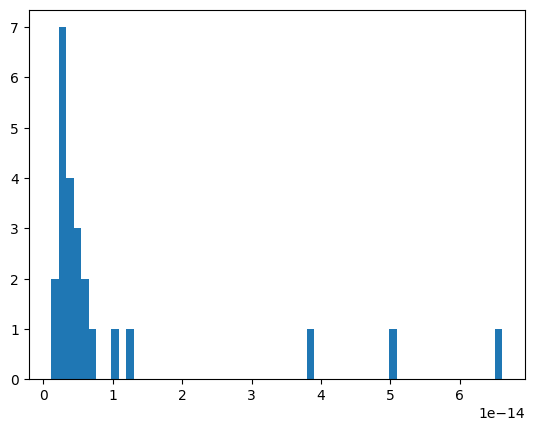

In [3]:
#zp correction; first correct for filter function (assumes a gaussian filter)
filt_fwhm = 80
a0 = 21.565
filter_func=0.5*np.sqrt(np.pi/np.log(2.)) * filt_fwhm
zp=a0 - 2.5*np.log10(filter_func)
aemag = instmag+ zp

#  convert from magnitudes to fluxes
fluxlog =-(aemag +21.48)/2.5
flux=10**(fluxlog)
print(flux)
plt.hist(flux,bins=60)
histflux = np.histogram(flux,bins=20)

##Convert to luminosity
## F = L/4piD^2
L = flux*(4*np.pi*3.21E6*3.086E18)**2
logL = np.log10(L)
print(min(logL),max(logL))

In [4]:
bins = np.arange(36,38.2,0.2)
lum_his = np.histogram(logL,bins=bins)
print(lum_his)
print(len(lum_his[0]),len(lum_his[1]))
bincenters = []
for i in range(len(bins)):
    if i>0:
        bincenters.append((bins[i]+bins[i-1])/2)
print(len(bincenters))
print(bincenters)

(array([0, 0, 0, 0, 0, 0, 2, 2, 8, 6, 2]), array([36. , 36.2, 36.4, 36.6, 36.8, 37. , 37.2, 37.4, 37.6, 37.8, 38. ,
       38.2]))
11 12
11
[36.1, 36.300000000000004, 36.50000000000001, 36.70000000000001, 36.90000000000001, 37.100000000000016, 37.30000000000002, 37.50000000000002, 37.700000000000024, 37.90000000000003, 38.10000000000003]


In [5]:
lum_weight = []
for i in range(len(bins)):
    if i>0:
        lum_weight.append(10**(bins[i]-40)-10**(bins[i-1]-40))
lum_weight=np.array(lum_weight)
lum_func = lum_his[0]/lum_weight
print(lum_func)
log_lumfunc = np.log10(lum_func)
print(log_lumfunc)

[   0.            0.            0.            0.            0.
    0.         2157.51303866 1361.29869756 3435.68564502 1625.82831829
  341.94277276]
[      -inf       -inf       -inf       -inf       -inf       -inf
 3.33395343 3.13395343 3.53601342 3.21107468 2.53395343]


/var/folders/p8/2qpn3ldx4s58gvbc0c41f6g80000gn/T/ipykernel_85102/1622514615.py:8: RuntimeWarning: divide by zero encountered in log10
  log_lumfunc = np.log10(lum_func)


Text(0, 0.5, 'log(N/dL)')

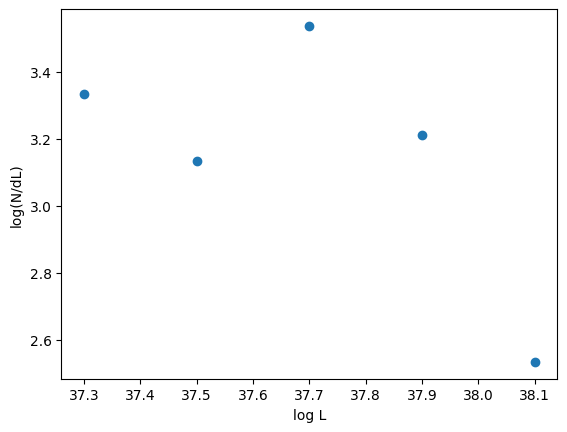

In [114]:
plt.scatter(bincenters,log_lumfunc)
#plt.ylim(0,6.5)
plt.xlabel('log L')
plt.ylabel('log(N/dL)')

In [46]:
hist=np.histogram(logL,bins=np.arange(min(logL),max(logL)+0.2,0.2))
print(hist[0])

[2 3 8 6 1 1 0 1 2]


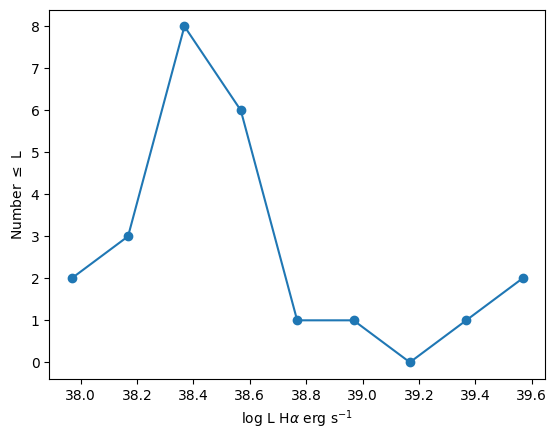

In [47]:
plt.scatter(bincenters,hist[0])
plt.plot(bincenters,hist[0])
plt.xlabel(r'log L H$\alpha$ erg s$^{-1}$')
plt.ylabel(r'Number $\leq$ L')
plt.show()